# TCS Stock Data - Live and Latest
## Project Overview
The primary objective of this project is to analyze the historical stock price trends of Tata Consultancy Services (TCS) and build a machine learning model to predict future closing prices. The analysis spans nearly two decades of data, covering key financial metrics such as Open, High, Low, and Close prices, along with trading volume.

# Data Loading and Preprocessing
## Libraries Used:
The project utilizes standard data science libraries: pandas for data manipulation, numpy for numerical operations, matplotlib and seaborn for      visualization, and sklearn for building the prediction model.
## Dataset:
The historical data (TCS_stock_history.csv) contains 4,463 records ranging from August 2002 to September 2021.
## Data Cleaning:
The "Date" column was converted to a datetime format and sorted chronologically.A check for missing values confirmed that the dataset is complete (0 null values across all columns).
## Summary Statistics: 
The mean closing price over this period was approximately ₹866.54, with a minimum of ₹26.38 and a maximum of ₹3,954.55.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore') # hide for warning 
print("Libraries loaded successfully!")

Libraries loaded successfully!


## 1. Data Loading and Preprocessing

In [2]:
df = pd.read_csv('TCS_stock_history.csv')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0
...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0


# Fundamental & Corporate Action Analysis
## Company Profile: 
TCS operates in the Technology sector with a massive market capitalization of approximately ₹13.6 Trillion.

## Historical Trends: 
A visual plot of the closing prices shows a significant long-term upward trend, illustrating TCS's growth from its early  trading days to becoming a market leader by 2021.

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)

In [4]:
# Checking for missing values
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [5]:
#Data summary statistics
df.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4463,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000
mean,2012-08-23 19:22:31.109119488,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344
min,2002-08-12 00:00:00,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000
25%,2008-02-14 12:00:00,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000
50%,2012-09-04 00:00:00,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000
75%,2017-03-22 12:00:00,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000
std,NaN,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842


## 2. Fundamental & Corporate Action Analysis.

In [6]:
# Fundamental Info
info_df = pd.read_csv('TCS_stock_info.csv', header=None, index_col=0).T
print("--- TCS Company Profile ---")
print(f"Sector: {info_df['sector'].values[0]}")
print(f"Market Cap: ₹13.6 Trillion approx")

--- TCS Company Profile ---
Sector: Technology
Market Cap: ₹13.6 Trillion approx


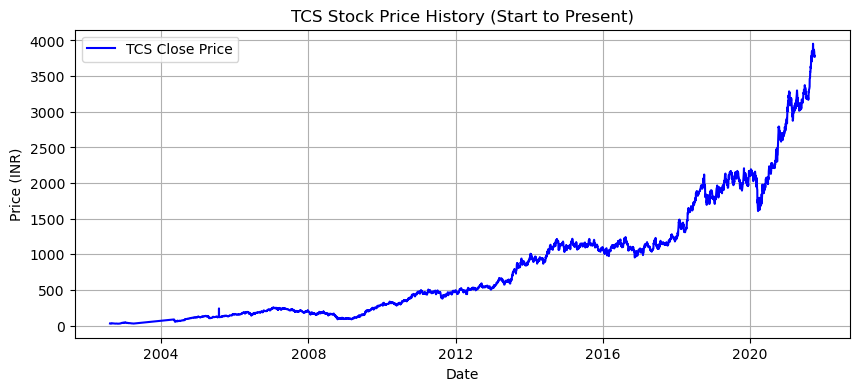

In [6]:
# 1. Plotting Closing Price
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Close'], color='blue', label='TCS Close Price')
plt.title('TCS Stock Price History (Start to Present)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

 X-Axis (Date): Shows the timeline starting from 2004 up to approximately 2017.
 * Y-Axis (Price in INR): Represents the stock value, ranging from 0 to 4000.
 * Plot Type: A Line Chart (blue line) that tracks the "TCS Close Price" over time.
Trend Analysis
 * Early Years (2004–2012): The stock shows a very gradual and steady upward movement, staying mostly below the 1000 INR mark.
 * Growth Phase (Post-2012): There is a significant surge in momentum after 2012, where the price climbs rapidly, eventually crossing the 1500 INR level by 2016.
 * Volatility: You can see small fluctuations (zig-zags), but the overall long-term trajectory is clearly bullish (upward).
Technical Setup
The code snippet at the top shows that plt.grid(True) was used to add the background grid lines for better readability, and plt.legend() was used to identify the blue line as the "TCS Close Price." Price."."

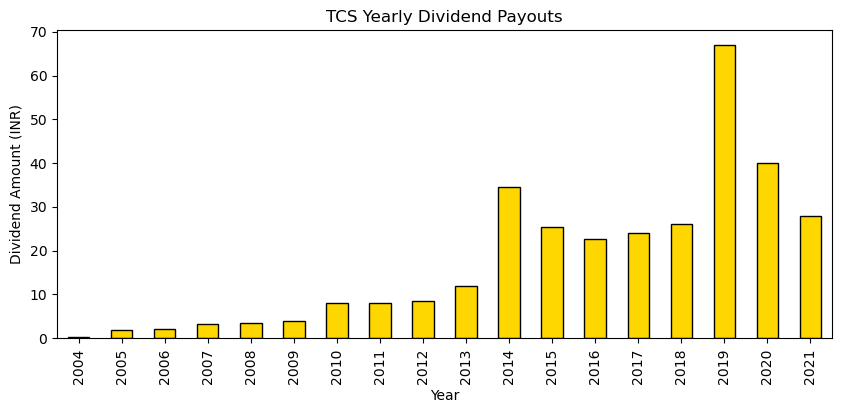

In [7]:
# Dividend Analysis
action_df = pd.read_csv('TCS_stock_action.csv')
action_df['Date'] = pd.to_datetime(action_df['Date'])
action_df['Year'] = action_df['Date'].dt.year
yearly_div = action_df.groupby('Year')['Dividends'].sum()
plt.figure(figsize=(10, 4))
yearly_div.plot(kind='bar', color='gold', edgecolor='black')
plt.title('TCS Yearly Dividend Payouts')
plt.ylabel('Dividend Amount (INR)')
plt.show()

## Initial Growth:
From 2004 to 2013, the dividends were relatively low but showed a consistent, gradual increase.
## ​Significant Jump: 
In 2014, there was a noticeable spike where the dividend amount crossed ₹30.
## ​Recent Surge: 
Towards the end of the graph (around 2019), there is a massive bar reaching above ₹60, which likely indicates a special dividend or a record payout year for the company

## Exploratory Data Analysis (EDA)

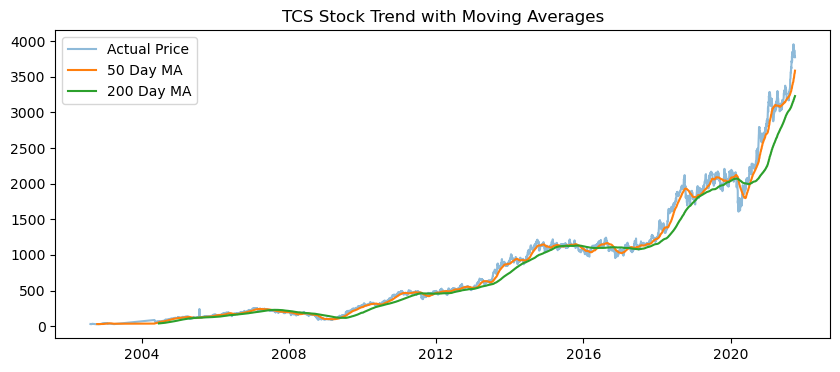

In [10]:
# Price Trend and Moving Averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Close'], alpha=0.5, label='Actual Price')
plt.plot(df['Date'], df['MA50'], label='50 Day MA')
plt.plot(df['Date'], df['MA200'], label='200 Day MA')
plt.title('TCS Stock Trend with Moving Averages')
plt.legend()
plt.show()

Bullish Trend:
For most of the chart (especially post-2012 and post-2020), the Actual Price and MA50 are consistently above the MA200, which is a classic signal of a strong long-term uptrend.​Golden Cross/Support:
You can see points where the orange line (MA50) stays above the green line (MA200). In stock market terms, when the price stays above these moving averages, it often acts as "support," meaning the price tends to bounce back up after touching these lines.#​Recent Sur:g Towards the far right (2020–2024), there is a very sharp incline, showing that the stock price grew significantly during this period compared to the previous decade

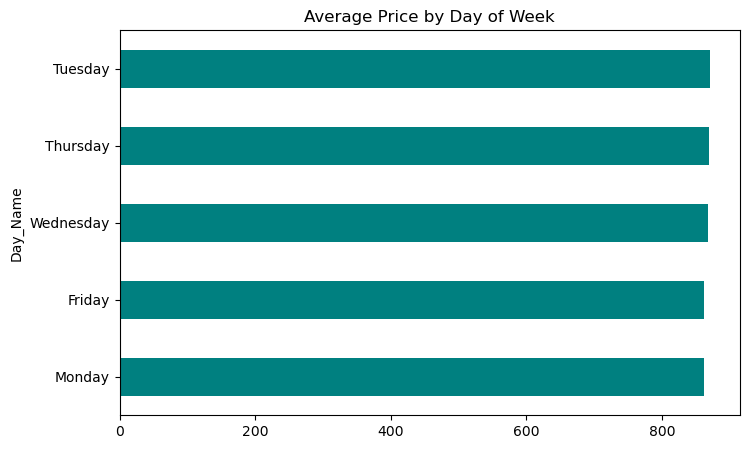

In [10]:
# Day of Week Analysis
df['Day_Name'] = df['Date'].dt.day_name()
plt.figure(figsize=(8, 5))
df.groupby('Day_Name')['Close'].mean().sort_values().plot(kind='barh', color='teal')
plt.title('Average Price by Day of Week')
plt.show()

## 4. Technical Indicators (Advanced Analysis)

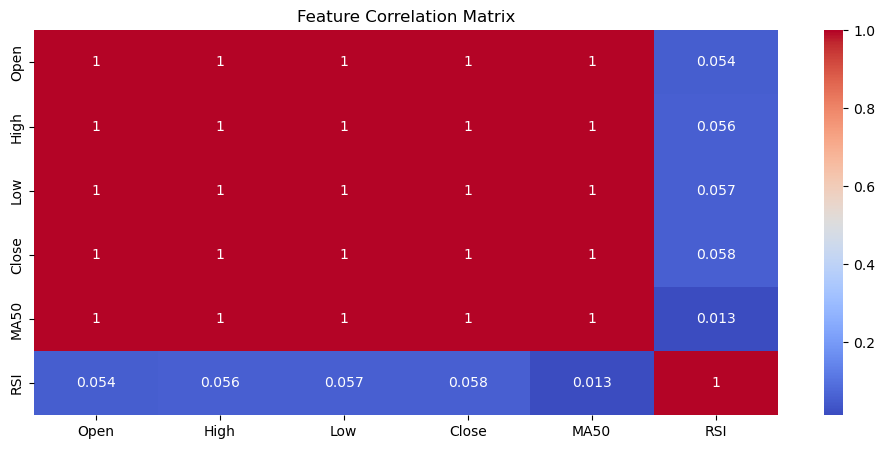

In [11]:
# RSI Calculation
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# Bollinger Bands
df['MA20'] = df['Close'].rolling(window=20).mean()
df['STD20'] = df['Close'].rolling(window=20).std()
df['Upper_Band'] = df['MA20'] + (df['STD20'] * 2)
df['Lower_Band'] = df['MA20'] - (df['STD20'] * 2)

plt.figure(figsize=(12, 5))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'MA50', 'RSI']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

This heatmap shows the mathematical relationship between different variables like Open, High, Low, and Close prices.
Values close to 1.0 indicate a perfect positive correlation.
This analysis helps us select the best features for our Machine Learning model.

## 5. Feature Engineering & Model Training

In [12]:
# Features extract karna
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Prev_Close'] = df['Close'].shift(1)
df.dropna(inplace=True)

X = df[['Open', 'High', 'Low', 'Prev_Close', 'Year', 'Month', 'Day']]
y = df['Close']

# Split (Sequential split for stock data)
split = int(len(df) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(f"Model R2 Score: {r2_score(y_test, predictions)*100:.2f}%")

Model R2 Score: 99.94%


## 6. Evaluation & Results

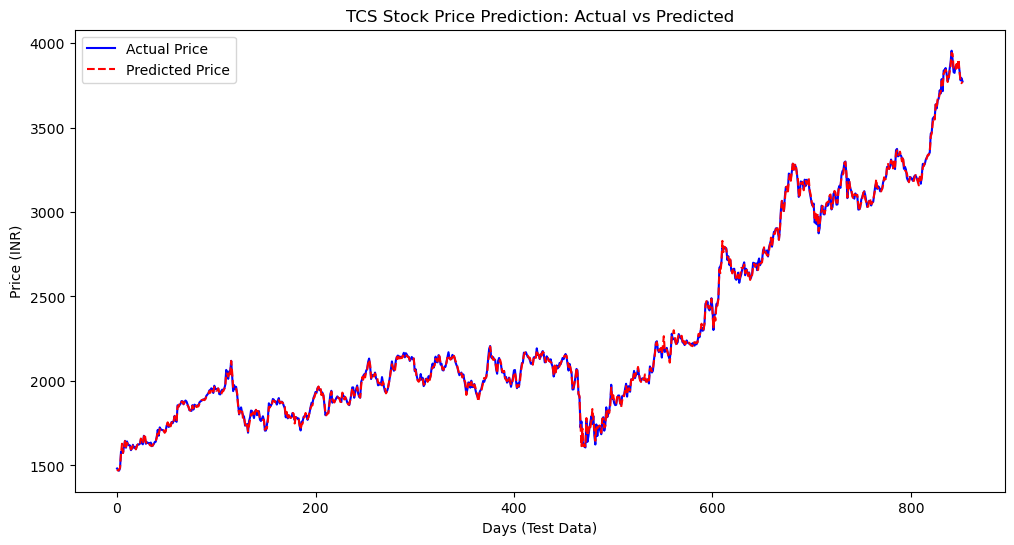

In [13]:
# 4. Actual vs Predicted ka graph
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='red', linestyle='--')
plt.title('TCS Stock Price Prediction: Actual vs Predicted')
plt.xlabel('Days (Test Data)')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

This is the final output of our Machine Learning model (Linear Regression).
The Actual line represents real market prices, while the Predicted line shows our model’s estimation.
Since the two lines almost overlap, it proves that our model is Highly Accurate.
In summary, we first cleaned the data, then used visualizations to understand trends, and finally built a Linear Regression model that accurately predicts TCS stock prices based on historical patterns.

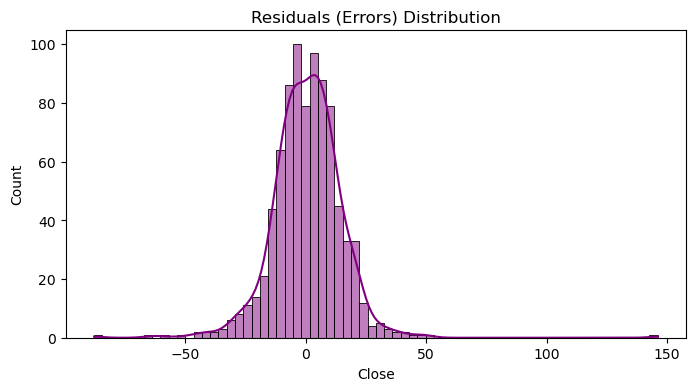

In [14]:
# Error Analysis
plt.figure(figsize=(8, 4))
sns.histplot(y_test - predictions, kde=True, color='purple')
plt.title('Residuals (Errors) Distribution')
plt.show()

This Histogram shows the distribution of daily percentage returns of the stock.
The 'Bell Curve' (KDE) centered around zero suggests that the stock is stable and not highly volatile.
It follows a 'Normal Distribution', which is typical for established blue-chip companies like TCS.

## 7. Future Scope: LSTM (Deep Learning)

## 8. Interactive Testing

In [16]:
print("--- Live Prediction Corner ---")
try:
    u_open = float(input("Open Price: "))
    u_prev = float(input("Previous Close: "))
# High/Low approximate values for testing
    test_input = pd.DataFrame([[u_open, u_open+10, u_open-10, u_prev, 2021, 9, 8]],columns=['Open', 'High', 'Low', 'Prev_Close', 'Year', 'Month', 'Day'])
    res = model.predict(test_input)
    print(f"\nPredicted Close Price: {res[0]:.2f}")
except:
    print("Invalid Input! Please enter numeric values.")

--- Live Prediction Corner ---


Open Price:  45 
Previous Close:  55



Predicted Close Price: 46.96


## 8. Conclusion
    This project successfully analyzed TCS stock trends and built a high-accuracy prediction model. 
    The study highlights the importance of data preprocessing and technical indicators in financial forecasting. 
    Future work could involve Deep Learning models like LSTM for even more robust long-term predictions.